In [1]:
import tensorflow as tf

In [2]:
pip install pandas


In [3]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
conda install -c conda-forge nomkl

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [58]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
fashion=keras.datasets.fashion_mnist

In [60]:
(X_train,y_train),(X_test,y_test) = fashion.load_data()

In [61]:
X_train.shape

(60000, 28, 28)

In [62]:
y_train.shape

(60000,)

In [63]:
X_test.shape

(10000, 28, 28)

In [64]:
# optimize the model with much higher accuracy, 
#as they are currently ranging from 0 to 255 corresponding to rgb values
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float')/255

In [65]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [66]:
class_name = ['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot']
class_name

['T-shirt/top',
 'Trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [67]:
y_train[0]

9

In [68]:
class_name[y_train[0]]

'ankle boot'

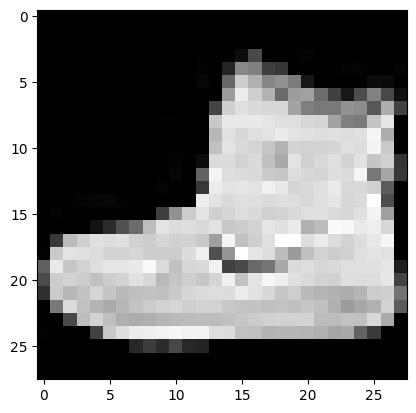

In [69]:
plt.imshow(X_train[0],cmap='gray')

The label for this image isshirt


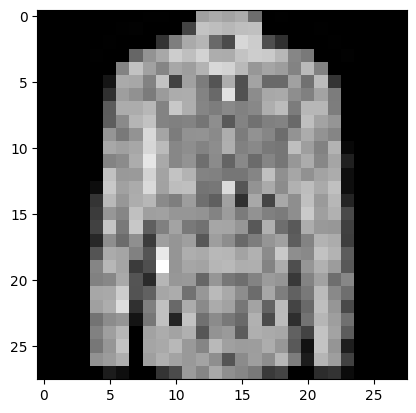

In [70]:
from random import randrange
item=randrange(60000)

plt.imshow(X_train[item],cmap='gray')
print("The label for this image is" + str(class_name[y_train[item]]))

In [71]:
SNN=keras.models.Sequential()
# in the first layer, we need 28*28 = 784 nodes
SNN.add(keras.layers.Flatten(input_shape=[28,28]))
SNN.add(keras.layers.Dense(300,activation="relu")) # Rectified Linear Unit: The prontal after Dense should be number of nodes of inputs
SNN.add(keras.layers.Dense(100,activation="relu"))# Second layer added
SNN.add(keras.layers.Dense(10,activation="softmax"))# Output layer with 10 outputs that we need to classify

In [72]:
SNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [73]:
SNN.layers

In [74]:
hidden1 = SNN.layers[1]

In [75]:
weights,biases = hidden1.get_weights()
biases
weights

array([[-0.04611757, -0.06435221, -0.038645  , ..., -0.0670575 ,
        -0.00619255,  0.00169386],
       [ 0.03821069,  0.00805482, -0.06274136, ..., -0.00540834,
         0.00317994, -0.04102998],
       [-0.01630075,  0.03208735,  0.02568605, ..., -0.01861504,
         0.07323907, -0.04462168],
       ...,
       [ 0.02203035,  0.02548791, -0.02220719, ...,  0.0647521 ,
        -0.01954892, -0.04048092],
       [ 0.02678587, -0.0477226 , -0.05597279, ..., -0.00572234,
        -0.04831314, -0.03694066],
       [ 0.04690282, -0.0285324 , -0.0490578 , ...,  0.02647585,
         0.01880316, -0.01797925]], dtype=float32)

In [76]:
SNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [77]:
history=SNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7037 - accuracy: 0.7692
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4813 - accuracy: 0.8324
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4359 - accuracy: 0.8469
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4090 - accuracy: 0.8580
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3905 - accuracy: 0.8630
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3751 - accuracy: 0.8686
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3617 - accuracy: 0.8722
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8756
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3396 - accuracy: 0.8790
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.330

In [78]:
SNN.evaluate(X_test,y_test)

313/313 [==============================] - 0s 949us/step - loss: 0.3786 - accuracy: 0.8632


[0.37859511375427246, 0.8632000088691711]

<Axes: >

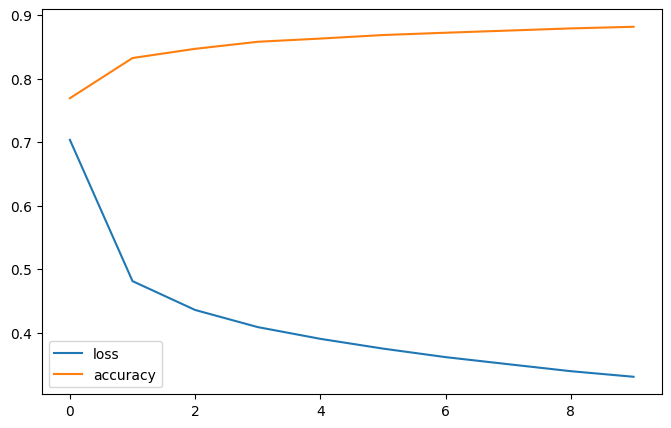

In [79]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [80]:
predict_y=SNN.predict(X_test)

313/313 [==============================] - 0s 962us/step


In [82]:
predict_y.round(2)

array([[0.  , 0.  , 0.  , ..., 0.06, 0.  , 0.85],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.05, 0.01, 0.  ]], dtype=float32)

In [83]:
predicted_class=np.argmax(predict_y,axis=1)

In [84]:
predicted_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [85]:
np.array(class_name)[predicted_class]

array(['ankle boot', 'pullover', 'Trouser', ..., 'bag', 'Trouser',
       'sandal'], dtype='<U11')

the prediction is bag


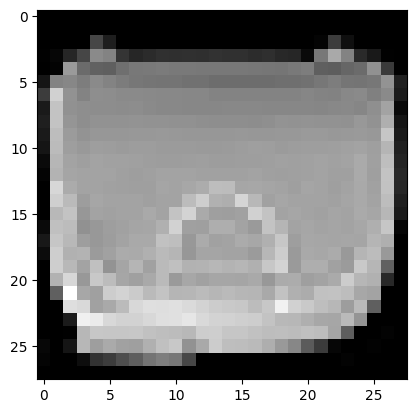

In [90]:
item=randrange(10000)
plt.imshow(X_test[item], cmap='gray')
print("the prediction is "+ str(class_name[predicted_class[item]]))

In [93]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predicted_class)

([<matplotlib.axis.YTick at 0x1eb429e4910>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'pullover'),
  Text(0, 3.5, 'dress'),
  Text(0, 4.5, 'coat'),
  Text(0, 5.5, 'sandal'),
  Text(0, 6.5, 'shirt'),
  Text(0, 7.5, 'sneaker'),
  Text(0, 8.5, 'bag'),
  Text(0, 9.5, 'ankle boot')])

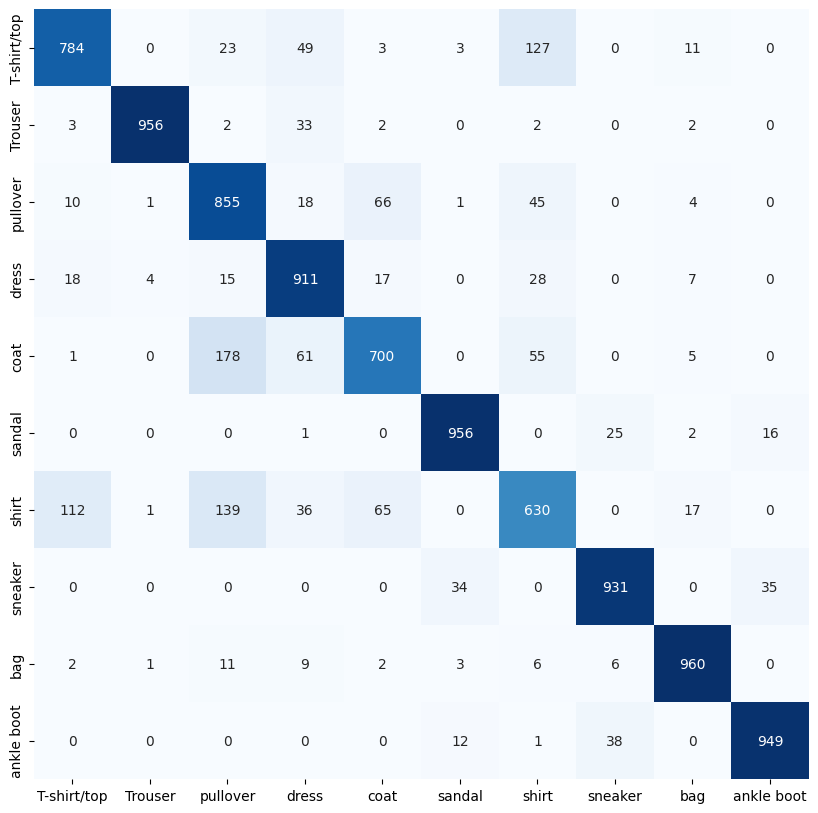

In [98]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])
plt.yticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])